
[Predicting customer churn with Python: Logistic regression, decision trees and random forests](https://dataskunkworks.com/2018/06/05/predicting-customer-churn-with-python-logistic-regression-decision-trees-and-random-forests/)

[Predict Customer Churn – Logistic Regression, Decision Tree and Random Forest](https://datascienceplus.com/predict-customer-churn-logistic-regression-decision-tree-and-random-forest/)

[Decision Trees, Classification & Interpretation Using Scikit-Learn...](https://gist.github.com/djshahbydt/9b84bd6e857f2d2a9ea6a589289f6ab3#file-decision-trees-classification-interpretation-using-scikit-learn-04-02-2017-ipynb)

[DECISION TREES, CLASSIFICATION & INTERPRETATION USING SCIKIT-LEARN](http://www.dxbydt.com/decision-trees-classification-interpretation-using-scikit-learn/)



https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction import DictVectorizer

import pydotplus

# Google specific
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

## Data collection

In [485]:
df_raw = pd.read_csv('../_data/WA_Fn-UseC_-Telco-Customer-Churn.csv', sep= ',', header=0)

In [486]:
df = df_raw.drop('customerID', axis=1)

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [488]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data preprocesing

### Inspecting Total Charges

In [489]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.loc[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [490]:
df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = 0

In [491]:
fmt = '{:<20} {}'
for col_name in df:
    print(fmt.format(col_name, df[col_name].unique()))

gender               ['Female' 'Male']
SeniorCitizen        [0 1]
Partner              ['Yes' 'No']
Dependents           ['No' 'Yes']
tenure               [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27  5
 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32 55
 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0 39]
PhoneService         ['No' 'Yes']
MultipleLines        ['No phone service' 'No' 'Yes']
InternetService      ['DSL' 'Fiber optic' 'No']
OnlineSecurity       ['No' 'Yes' 'No internet service']
OnlineBackup         ['Yes' 'No' 'No internet service']
DeviceProtection     ['No' 'Yes' 'No internet service']
TechSupport          ['No' 'Yes' 'No internet service']
StreamingTV          ['No' 'Yes' 'No internet service']
StreamingMovies      ['No' 'Yes' 'No internet service']
Contract             ['Month-to-month' 'One year' 'Two year']
PaperlessBilling     ['Yes' 'No']
PaymentMethod        ['Electronic check' 'Mailed check'

## Feature engineering

### Categorical

Typically, any data attribute which is categorical in nature represents discrete values. These discrete values can be text or numeric in nature (or even unstructured data like images!)

#### Classes of categorical attributes

* Nominal: no concept of ordering amongst the values of that attribute (e.g. gender)
* Ordinal: some sense or notion of order amongst its values (e.g. t-shirt size, education level)

#### Transforming categorical attributes

The idea here is to transform these attributes into a more representative numerical format which can be easily understood by downstream code and pipelines


#### Encoding Categorical Attributes


### Numeric


* Ordinal
* Continous 

* https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

* https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
* https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

In [492]:
features = df.iloc[:, 0:19]
labels = df.iloc[:, -1]

#### Converting categorical values to discret integers

In [493]:
def convert_tenure_groups(val):
    if(val < 12):
        return 0 # "0-12 Month"
    elif(val < 24):
        return 1 # "12-24 Month"
    elif(val < 48):
        return 2 # "24-48 Month"

    return 3 # "> 60 Month"

features['TenureGroup'] = features['tenure'].apply(convert_tenure_groups)
features = features.drop('tenure', axis=1) #do not need this

In [494]:
def convert_no_service(txt):
    if(txt == "No internet service"):
        return "No"
    
    if(txt == "No phone service"):
        return "No"
  
    return txt

features = features.applymap(convert_no_service)

In [495]:
fmt = '{:<20} {}'
for col_name in features:
    print(fmt.format(col_name, features[col_name].unique()))

gender               ['Female' 'Male']
SeniorCitizen        [0 1]
Partner              ['Yes' 'No']
Dependents           ['No' 'Yes']
PhoneService         ['No' 'Yes']
MultipleLines        ['No' 'Yes']
InternetService      ['DSL' 'Fiber optic' 'No']
OnlineSecurity       ['No' 'Yes']
OnlineBackup         ['Yes' 'No']
DeviceProtection     ['No' 'Yes']
TechSupport          ['No' 'Yes']
StreamingTV          ['No' 'Yes']
StreamingMovies      ['No' 'Yes']
Contract             ['Month-to-month' 'One year' 'Two year']
PaperlessBilling     ['Yes' 'No']
PaymentMethod        ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges       [ 29.85  56.95  53.85 ...,  63.1   44.2   78.7 ]
TotalCharges         [   29.85  1889.5    108.15 ...,   346.45   306.6   6844.5 ]
TenureGroup          [0 2 1 3]


In [496]:
features['gender'].replace(['Male','Female'],[0,1],inplace=True)
features['MultipleLines'].replace(['No phone service', 'No', 'Yes'],[0,0,1],inplace=True)
features['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,1],inplace=True)
features['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
features['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [497]:
labels.replace(['Yes','No'],[1,0],inplace=True)

In [498]:
exclude_features = [
    'gender', 
    'SeniorCitizen', 
    'tenure', 
    'TenureGroup',
    'MultipleLines',
    'InternetService',
    'Contract',
    'PaymentMethod',
    'MonthlyCharges', 
    'TotalCharges']

categorical_feat_cols = [feat for feat in features if feat not in exclude_features]

In [499]:
#label_encoder = LabelEncoder()

def encode_features(val):
    if(val.lower() == "yes"):
        return 1
    else:
        return 0

for col_name in categorical_feat_cols:
    features[col_name] = features[col_name].apply(encode_features)


In [500]:
fmt = '{:<20} {}'
for col_name in features:
    print(fmt.format(col_name, features[col_name].unique()))

gender               [1 0]
SeniorCitizen        [0 1]
Partner              [1 0]
Dependents           [0 1]
PhoneService         [0 1]
MultipleLines        [0 1]
InternetService      [1 0]
OnlineSecurity       [0 1]
OnlineBackup         [1 0]
DeviceProtection     [0 1]
TechSupport          [0 1]
StreamingTV          [0 1]
StreamingMovies      [0 1]
Contract             [0 1 2]
PaperlessBilling     [1 0]
PaymentMethod        [0 1 2 3]
MonthlyCharges       [ 29.85  56.95  53.85 ...,  63.1   44.2   78.7 ]
TotalCharges         [   29.85  1889.5    108.15 ...,   346.45   306.6   6844.5 ]
TenureGroup          [0 2 1 3]


In [501]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
TenureGroup         7043 non-null int64
dtypes: float64(2), int64(17)
memory usage: 1.0 MB


In [502]:
print(type(labels))

<class 'pandas.core.series.Series'>


## Correlations between customer data features and customer churn

#### Inspecting the balance

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [503]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Correlation matrix
Inspecting features for potential good and bad features

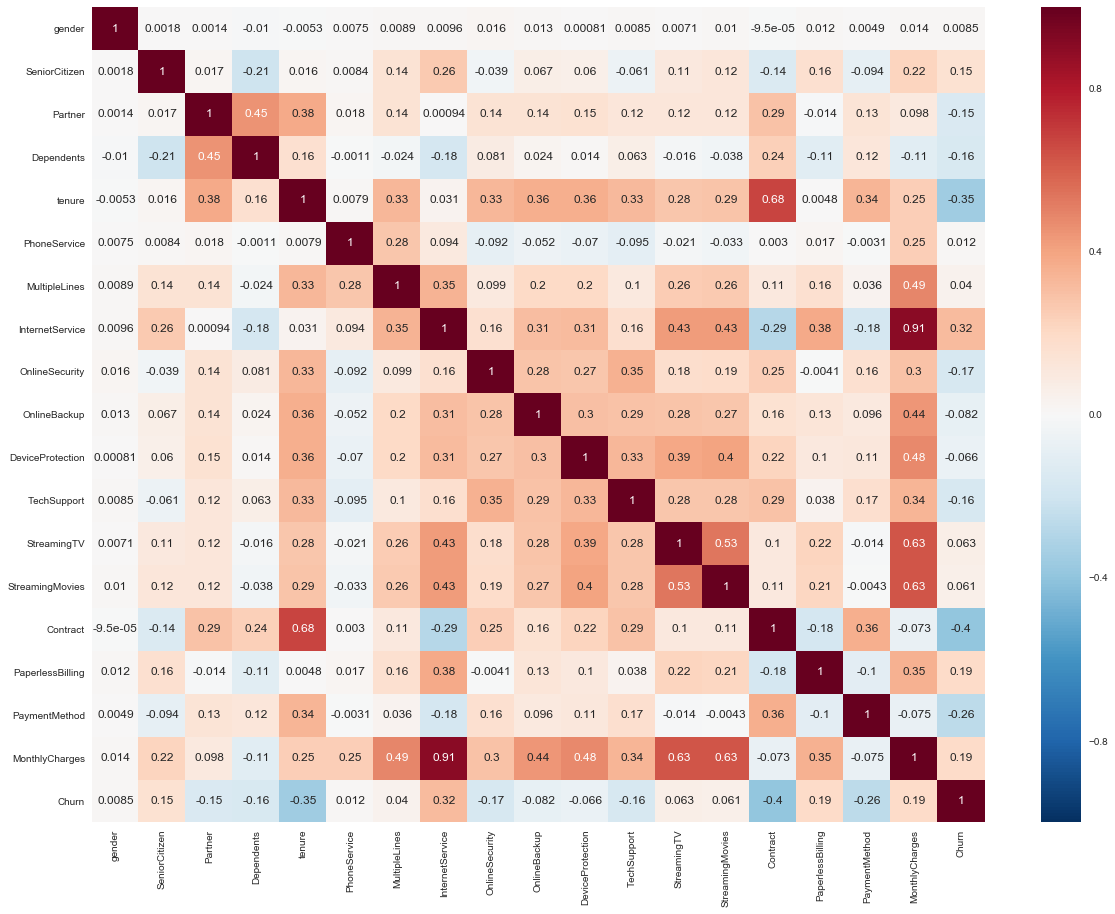

In [504]:
corr = df_features.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Avoiding multicollinearity

Correlation of explanatory variables is known as multicollinearity, and perfect multicollinearity occurs when the correlation between two independent variables is equal to 1 or -1.

* Total Charges is highly correlated with Tenure and Monthly Charges

In [505]:
features = features.drop('TotalCharges', axis=1) #do not need this

## Prepare train and test data sets

In [506]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.33, random_state = 100)

## Find optimal depth

(3, 0.7703206648989781)


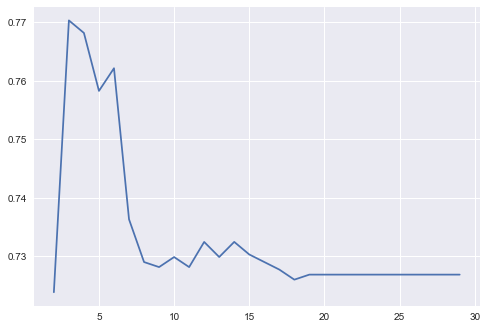

In [507]:
depth_scores = []

for depth in range(2, 30):
    clf = tree.DecisionTreeClassifier(
        class_weight = None, # "balanced",
        criterion = "entropy", # gini, entropy
        max_depth = depth, 
        min_samples_leaf = 5,
        random_state = 100
    )

    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator = clf, X = X_test, y = y_test, cv = 7, n_jobs = 4)
    #print((i, scores.mean()))
    depth_scores.append((depth, scores.mean()))

print(max(depth_scores, key=lambda item:item[1]))
plt.plot(*zip(*depth_scores))
plt.show()

# (10, 0.71440200958273248, 19)

## Decision Tree Classifier


#### Criterion

* Gini Impurity 
* Entropy


This also means that in principle, if we used only one feature in a predictive model, the proline content will allow us to predict correctly to a maximum 1-0.658 = 0.342 = 34.2% of the time, assuming that the original learned decision tree predicts perfectly.

#### Meassuring Performance

* ROC: Receiver Operating Characteristic
* AUROC: Area Under ROC (curve)



In [508]:
## entropy, gini
clf = DecisionTreeClassifier(
    class_weight = None,
    criterion = "gini", 
    max_depth = 4, 
    min_samples_leaf = 5,
    random_state = 100
)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [509]:
clf.classes_

array([0, 1])

In [510]:
print("accuracy on training set: %f" % clf.score(X_train, y_train))
print("accuracy on test set: %f" % clf.score(X_test, y_test))

accuracy on training set: 0.788894
accuracy on test set: 0.769462


## Inspecting accuracy

In [511]:
y_test_pred = clf.predict(X_test)

#### Confusion matrix

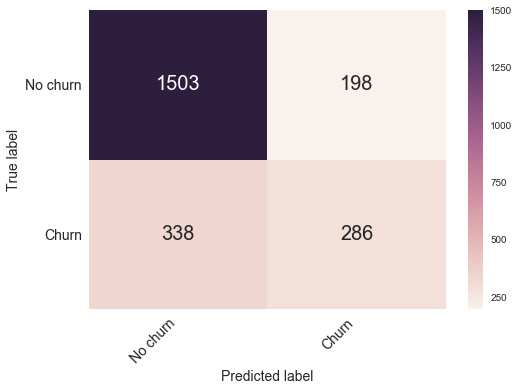

In [512]:
cfm = confusion_matrix(y_test, y_test_pred)
df_confusion_matrix = pd.DataFrame(cfm, ('No churn', 'Churn'), ('No churn', 'Churn'))

heatmap = sns.heatmap(df_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)

plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

plt.show()

#### Classification report

In [513]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      1701
          1       0.59      0.46      0.52       624

avg / total       0.76      0.77      0.76      2325



#### Feature importance
The most commonly used summary is feature importance. Closer to 1 the more important a feature is.


 [ 0.          0.          0.          0.          0.          0.
  0.03043173  0.01138995  0.          0.          0.          0.
  0.00361906  0.61219397  0.          0.0297546   0.16707969  0.145531  ]


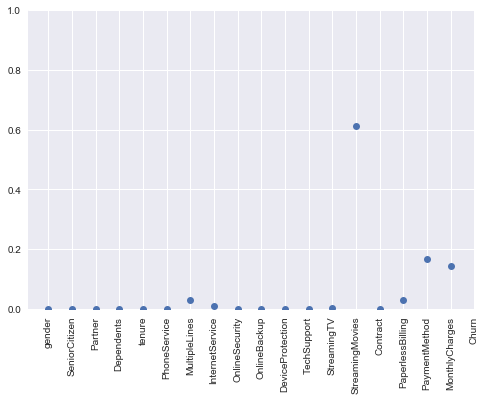

In [514]:
print("\n", clf.feature_importances_)

plt.plot(clf.feature_importances_, 'o')
plt.xticks(range(df_features.shape[1]), df_features.columns.values, rotation=90)
plt.ylim(0,1)
plt.show()

## Visual decision tree

In [515]:
y_train.value_counts()

0    3473
1    1245
Name: Churn, dtype: int64

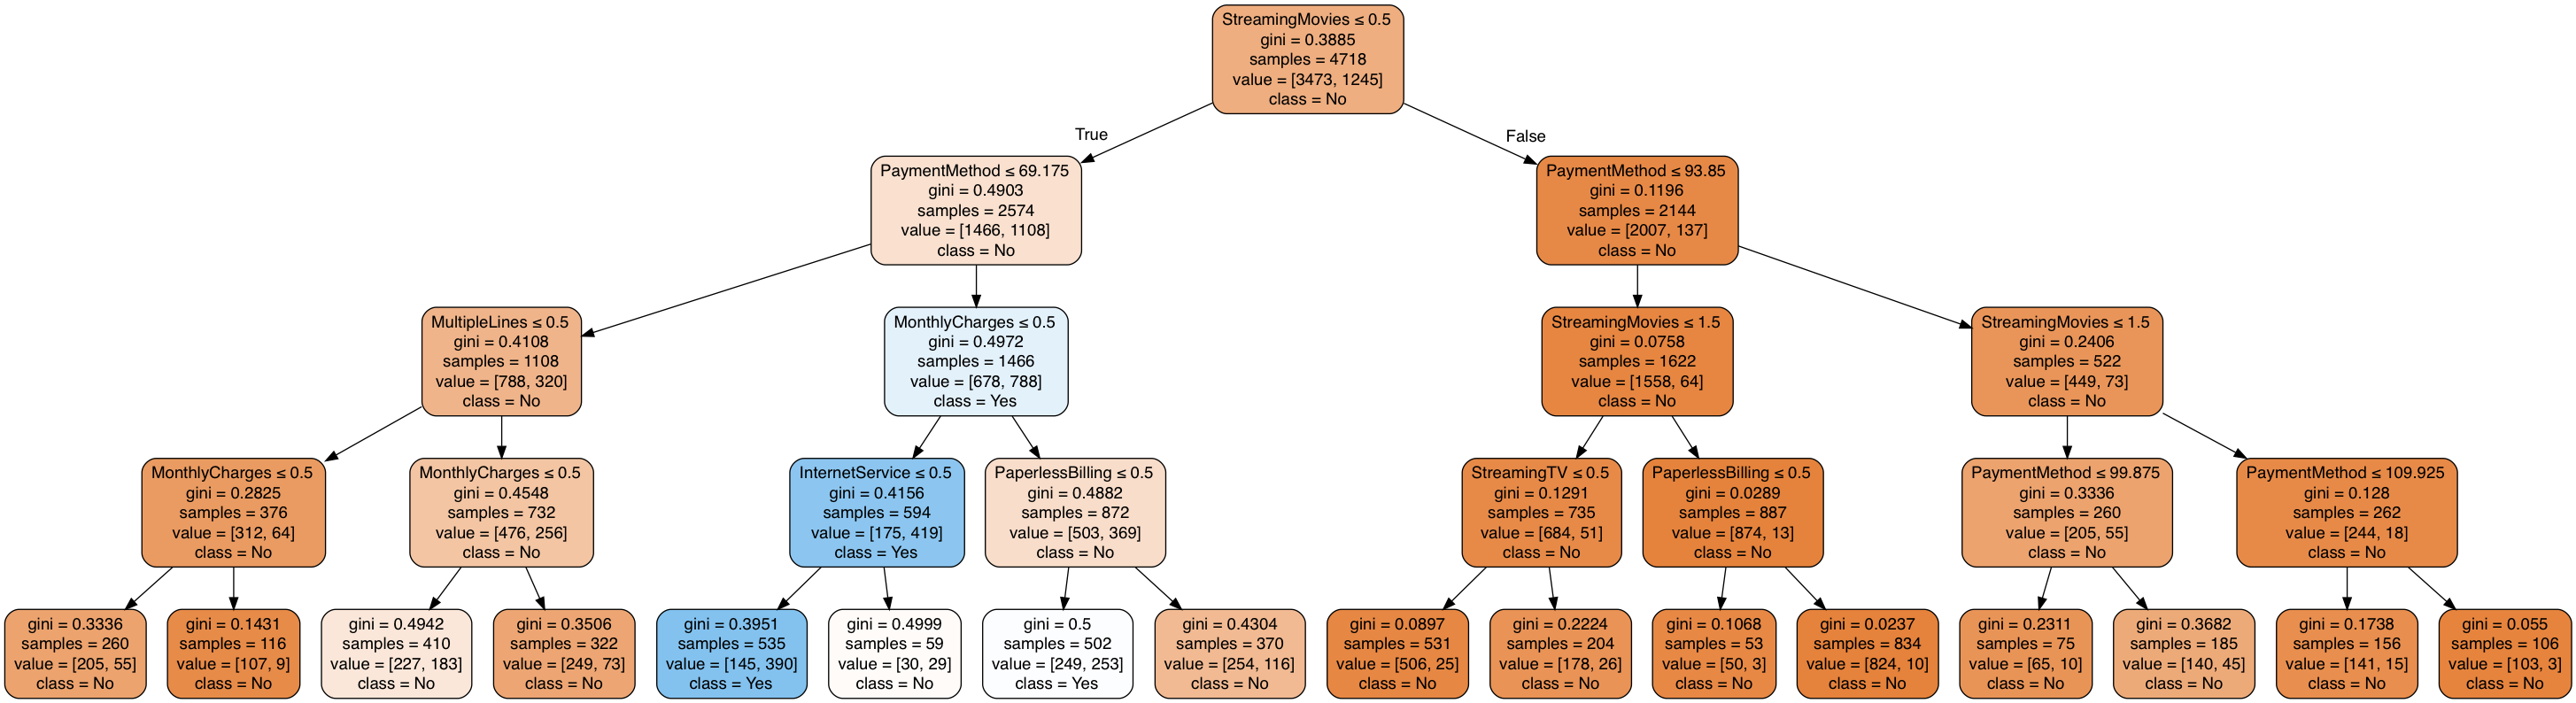

In [516]:
from IPython.display import Image  
#import graphviz

# Create DOT data
dot_data = tree.export_graphviz(clf, 
                                out_file = None, 
                                filled = True,
                                rounded = True,
                                special_characters = True,
                                feature_names = df_features.columns.values, # ['Contract', 'TenureGroup', 'PaperlessBilling'],  
                                class_names = ['No', 'Yes']) #['No', 'Yes']

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

## Color of nodes
nodes = graph.get_node_list()

# Show graph
Image(graph.create_png())

#### Understanding gini in the tree above

This also means that in principle, if we used only one feature in a predictive model, the proline content will allow us to predict correctly to a maximum 1-0.658 = 0.342 = 34.2% of the time, assuming that the original learned decision tree predicts perfectly.


In [350]:
g = graphviz.Source(graph)
g.render('decision_tree.gv', view=True)

CalledProcessError: Command '['dot', '-Tpdf', '-O', 'decision_tree.gv']' returned non-zero exit status 1.

In [169]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

NameError: name 'test' is not defined

In [134]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as a Python function

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [136]:
tree_to_code(clf, df_features.columns.values)

def tree(Contract, PaperlessBilling, TenureGroup):
  if PaperlessBilling <= 0.5:
    if TenureGroup <= 0.5:
      if Contract <= 1.5:
        if Contract <= 0.5:
          return [[  54.  422.]]
        else:  # if Contract > 0.5
          return [[  6.  45.]]
      else:  # if Contract > 1.5
        return [[  4.  21.]]
    else:  # if TenureGroup > 0.5
      if TenureGroup <= 1.5:
        if Contract <= 0.5:
          return [[  11.  151.]]
        else:  # if Contract > 0.5
          return [[  12.  128.]]
      else:  # if TenureGroup > 1.5
        if TenureGroup <= 2.5:
          return [[  52.  373.]]
        else:  # if TenureGroup > 2.5
          return [[  61.  574.]]
  else:  # if PaperlessBilling > 0.5
    if TenureGroup <= 0.5:
      if Contract <= 0.5:
        return [[  59.  722.]]
      else:  # if Contract > 0.5
        if Contract <= 1.5:
          return [[  5.  21.]]
        else:  # if Contract > 1.5
          return [[ 2.  5.]]
    else:  # if TenureGroup > 0.5
   